# Anomaly Detection Models for IoT Data - Full Guide
In-situ sensors and Wireless Sensor Networks (WSNs) have become more and more popular in the last decade, due to their potential to be used in various applications of many different fields. As of today, WSNs are pretty much used by any monitoring system: from those that are health care related, to those that are used for environmental forecasting or surveillance purposes. 

All applications that make use of in-situ sensors, strongly rely on their correct operation, which however, is quite difficult to guarantee. These sensors in fact, are typically cheap and prone to malfunction. Additionally, for many tasks (e.g. environmental forecasting), sensors are also deployed under potentially harsh weather condition, making their breakage even more likely. The high probability of erroneous readings or data corruption during transmission, brings up the problem of ensuring quality of the data collected by sensors. Since WSNs have to operate continuously and therefore generate very large volumes of data every day, the quality-control process has to be automated, scalable and fast enough to be applicable to streaming data. 

The goal of this project is to apply anomaly detection models on IoT data in order to find acquisitions that present anomalies, i.e., mistakes in acquiring the data, or unexpected variations of the assesses. We were provided a dataset that contains weather acquisitions of different features, such as ‘rain’, ‘wind’ and ‘temperature’. This project was carried out as part of the training of engineers at Tunisia Polytechnic School under the module "Transversal Project" in the third year.

<img src='https://datascience.aero/wp-content/uploads/2018/02/AnomalyDetectionData-1-826x532.png' width="50%" eight="50%">

The most common approach to ensure the quality of sensors’ data, consists in automated detection of erroneous readings or anomalous behaviors of sensors. In the literature, this strategy is known as anomaly detection and can be pursued in many different ways.

In order to solve an anomaly detection problem, we propose these different approaches:

-	Statistical methods: These methods use past measurements to approximate a model of the correct behavior of a sensor, where they mark as an anomaly an incompatible result. In this project, the Average Low-High Pass Filter and Seasonal Extreme Studentized Deviate methods were used.

-	Probabilistic methods: These methods rely on estimating the probability of the behavior of a sensor, using different well-known distributions, and compare it with a predefined threshold. In this project, the Univariate Gaussian Predictor was used.

-	Clustering-based methods: These methods are dependent on calculating the distances between data measurements to distinguish between anomalous and correct readings by assigning the latter to clusters. In this project, the Local Density Cluster-Based Outlier Factor was used.

**Necessary Skills:**
- Python programming language
- Anomaly detection basics
- Feature engineering

## State of the Art
In our situation, we have a dataset that contains weather acquisitions of different features, such as ‘rain’, ‘wind’ and ‘temperature’. We would like to find out the values that present an anomaly, i.e., a mistake in acquiring the data, or an unexpected variation of the assesses.
So, we decided to organize our work in this way:

1. Import libraries
2. Load the data
3. Prepare the data
4. Organize the data
5. Choose an evaluation metric
6. Use different models
7. Experimental results
8. Conclusion
9. References

We encountered many problems throughout the implementation of a solution to this issue, such as fixing an evaluation metric in a problem where you do not have a label. In addition, we do not have experience in things related to the weather, therefore, we spent a good amount of time trying to figure out which values fit the best.

So far, we have developed a source code that allow us to separate outliers from saint values. We intend to utilize this work in real time problems in the future, where data are collected instantly with sensors.

Let's get started!

PS: 'pluie' refers to rain and 'vent' refers to wind.

## 1. Import libraries

In order to be able to manipulate the data, we need to import the necessary python libraries:
- Numpy: This library offers mathematical functions to operatore on arrays. We will need it in order to manipulate multi-dimensional arrays and matrices.
- Pandas: This library offers offers data structures and operations for manipulating numerical tables and time series. We will need it in order to manipulate and analyse data. 
- Matplotlib: This library offers an object-oriented API for embedding plots into applications. We will need it in order to visualize some data graphs and functions.
- Scikit-learn: This library offers various machine learning algorithms. We will need it in order to train the data using a linear regression model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import axes, title
import numpy as np

## 2. Load the data

That is it with python libraries. We will now load the data in order to manipulate it and run it on the models later on.

PS: The data will be of type 'DataFrame', a table of data, i.e. a single set of formatted two-dimensional data, columns being the features and rows being examples.

In [2]:
# Load the data set
df0 = pd.read_csv("../input/data_tunis.csv")

#Visualize the DataFrame df0
df0

,date,Tmin,Tmax,vent,pluie
0,01/01/2010,12.0,19.0,50.0,0.0
1,02/01/2010,12.0,17.0,35.0,2.7
2,03/01/2010,11.0,18.0,15.0,0.5
3,04/01/2010,9.0,19.0,13.0,0.0
4,05/01/2010,8.0,23.0,16.0,0.0
...,...,...,...,...,...
2917,27/12/2017,-5.0,17.0,29.0,0.0
2918,28/12/2017,9.0,13.0,28.0,3.5
2919,29/12/2017,10.0,15.0,39.0,6.3
2920,30/12/2017,NaN,NaN,NaN,NaN


## 3. Prepare the data

Preparing and cleaning the data is the most important step in data analysis. It is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. (Wikipedia)

First, we will use the built-in function **bfill()**. The latter is used to backward fill the missing values in the dataset, since sometimes we find missing values of the different features. We believe that the variation of the features between consecutives days will not vary much.

Second, we will use the built-in function **dropna()**. This function is used to remove the totally missing rows. There is not interest in working with an acquisation that contains no values at all.

Finally, we will replace the minimum temperature and the maximum temperature with the average temperature in order to minimize the number of features and be able to visualize the dataset in three dimensions (‘wind’, ‘rain’, ‘temp’).

In [3]:
# Fill some null values
df0 = df0.bfill(axis=0)

# Remove null acquisations
df0 = df0.dropna()

# Replace min_temp and max_temp with avg_temp
df0['temp'] = (df0['Tmin'] + df0['Tmax']) / 2
df0 = df0.drop('Tmin',axis=1)
df0 = df0.drop('Tmax',axis=1)

df0

,date,vent,pluie,temp
0,01/01/2010,50.0,0.0,15.5
1,02/01/2010,35.0,2.7,14.5
2,03/01/2010,15.0,0.5,14.5
3,04/01/2010,13.0,0.0,14.0
4,05/01/2010,16.0,0.0,15.5
...,...,...,...,...
2915,25/12/2017,15.0,0.2,8.0
2916,26/12/2017,29.0,0.0,11.5
2917,27/12/2017,29.0,0.0,6.0
2918,28/12/2017,28.0,3.5,11.0


## 4. Organize the data
Now, we will separate the data on the twelve months of the year. We will have as an input a data frame on the whole year, and as an output, twelve data frames for each month.

In [4]:
# Create empty dataframes for each month
df_jan = pd.DataFrame(columns=df0.columns)
df_feb = pd.DataFrame(columns=df0.columns)
df_mar = pd.DataFrame(columns=df0.columns)
df_apr = pd.DataFrame(columns=df0.columns)
df_may = pd.DataFrame(columns=df0.columns)
df_jun = pd.DataFrame(columns=df0.columns)
df_jul = pd.DataFrame(columns=df0.columns)
df_aug = pd.DataFrame(columns=df0.columns)
df_sep = pd.DataFrame(columns=df0.columns)
df_oct = pd.DataFrame(columns=df0.columns)
df_nov = pd.DataFrame(columns=df0.columns)
df_dec = pd.DataFrame(columns=df0.columns)

# Fill the dataframes of each month
for i in range(len(df0)):
    if df0.loc[i]['date'][3:5] == '01':
        df_jan = df_jan.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '02':
        df_feb = df_feb.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '03':
        df_mar = df_mar.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '04':
        df_apr = df_apr.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '05':
        df_may = df_may.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '06':
        df_jun = df_jun.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '07':
        df_jul = df_jul.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '08':
        df_aug = df_aug.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '09':
        df_sep = df_sep.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '10':
        df_oct = df_oct.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '11':
        df_nov = df_nov.append(df0.loc[i])
    if df0.loc[i]['date'][3:5] == '12':
        df_dec = df_dec.append(df0.loc[i])

## 5. Choose an evaluation metric

To avoid repetition in code, we will define a data frame called ‘df_curr’ that will be changed for every month and that will go through the different algorithms.

For example, df_curr = df_jan.



In [5]:
# Choose a month to work with; for example: January
df_curr = df_jan

# Remove the columns 'date' and 'index'
df_curr = df_curr.reset_index().drop(['date','index'],axis=1)

# Get xdata, ydata and zdata to make 3D plot later on
xdata = df_curr['vent']
ydata = df_curr['pluie']
zdata = df_curr['temp']

Since we are working on an unsupervised learning problem, we do not have an evaluation metric to compare the different algorithms. That is why we thought about creating reference points where there is an anomaly.

Based on this, we defined some specific thresholds for each month/season that will create our set of referenced anomaly points.

For example, for January, a reference anomaly point is a point where:

-	‘pluie’ > 20
-	or ‘vent’ > 60
-	or ‘temp’ > 30 
-	or ‘temp’ < 6

This seems logical since it is winter and the average temperature is between 10°C and 25°C and rainfalls is between 0 and 10.

In [6]:
# Create empty dataframe for reference points
df_anomaly_reference = pd.DataFrame(columns=df_curr.columns)

# Define thresholds that will present anomalies; for example: January will present these values
MAX_PLUIE = 20
MAX_VENT = 60
MAX_TEMP = 30
MIN_TEMP =  6

# # Fill the dataframe of reference points
for i in range(len(df_curr)):
    if df_curr.loc[i, 'pluie'] > MAX_PLUIE or df_curr.loc[i, 'vent'] > MAX_VENT or df_curr.loc[i, 'temp'] > MAX_TEMP or df_curr.loc[i, 'temp'] < MIN_TEMP:
        df_anomaly_reference = df_anomaly_reference.append(df_curr.loc[i])

print("The number of anomalies reference is: " + str(len(df_anomaly_reference)))

The number of anomalies reference is: 6


## 6. Use different models
After all this preprocessing, we will present the different algorithms in different cells. We will work on 5 algorithms called:

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Isolation Forests (IF)
- Local Outlier Factor (LOF)
- Elliptic Envelope (EE)
- One-Class Support Vector Machine (1CSVM)

For every algorithm, we will plot the dataset in three dimensions (‘vent’, ‘pluie’, ‘temp’), having the outliers in red color and the normal values in white color.
 
Let’s note that we plotted the dataset in two figures in two dimensions: one ‘pluie’ = f(‘vent’) and one ‘pluie’ = f(‘temp’) and we found that it will be harder to understand the visualization in two dimensions.

### 6.1 DBSCAN
DBSCAN: This is a clustering algorithm (an alternative to K-Means) that clusters point together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance. The method, step-by-step:

1.	Randomly select a point not already assigned to a cluster or designated as an outlier. Determine if it’s a core point by seeing if there are at least min_samples point around it within epsilon distance.
2.	Create a cluster of this core point and all points within epsilon distance of it (all directly reachable points).
3.	Find all points that are within epsilon distance of each point in the cluster and add them to the cluster. Find all points that are within epsilon distance of all newly added points and add these to the cluster. Rinse and repeat. (i.e. perform “neighborhood jumps” to find all density-reachable points and add them to the cluster).

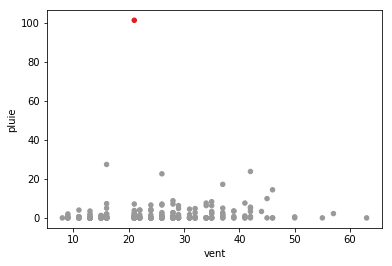

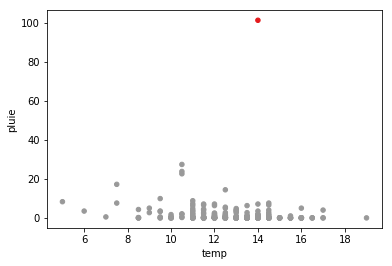

In [7]:
# 1st algorithm: DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
outlier_detection = DBSCAN(eps = .2, metric="euclidean", min_samples = 5, n_jobs = -1)
num2 = scaler.fit_transform(df_curr)
num2 = pd.DataFrame(num2, columns = df_curr.columns)
clusters = outlier_detection.fit_predict(num2)

# 2D Plot: pluie = f(vent)
from matplotlib import cm
cmap = cm.get_cmap('Set1')
df_curr.plot.scatter(x='vent',y='pluie', c=clusters, cmap=cmap, colorbar = False)

# 2D Plot: pluie = f(temp)
from matplotlib import cm
cmap = cm.get_cmap('Set1')
df_curr.plot.scatter(x='temp',y='pluie', c=clusters, cmap=cmap, colorbar = False)

# PS: This will be the only time that we show 2D plots

DBSCAN  | True Negative = 1
DBSCAN  | False Positive = 0


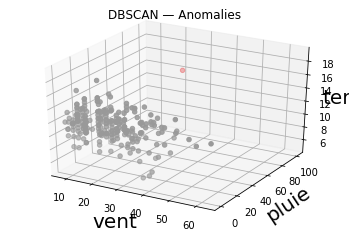

In [8]:
# 3D Plot: pluie = f(temp, vent)
ax = axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=clusters, cmap=cmap)
ax.set_xlabel('vent',fontsize=20)
ax.set_ylabel('pluie',fontsize=20)
ax.set_zlabel('temp',fontsize=20)
title('DBSCAN — Anomalies')

true_predicted = 0
mistakes = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if clusters[i] == -1 and i in df_anomaly_reference.index:
        true_predicted += 1
    if clusters[i] == -1 and i not in df_anomaly_reference.index:
        mistakes += 1

print("DBSCAN  | True Negative = " + str(true_predicted))
print("DBSCAN  | False Positive = " + str(mistakes))

### 6.2 Isolation Forest
Isolation Forests: This is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies, instead of the most common techniques of profiling normal points. For each observation, do the following:

1.	Randomly select a feature and randomly select a value for that feature within its range.
2.	If the observation’s feature value falls above (below) the selected value, then this value becomes the new min (max) of that feature’s range.
3.	Check if at least one other observation has values in the range of each feature in the dataset, where some ranges were altered via step 2. If no, then the observation is isolated.
4.	Repeat steps 1–3 until the observation is isolated. The number of times you had to go through these steps is the isolation number. The lower the number, the more anomalous the observation is.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forests | True Negative = 2
Isolation Forests | False Positive = 1


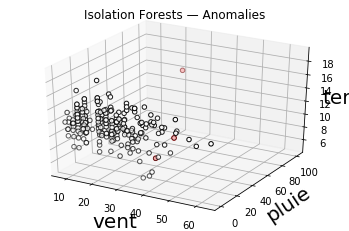

In [9]:
# 2nd algorithm: Isolation Forests
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.01) 
clf.fit(df_curr)
if_scores = clf.decision_function(df_curr)
if_anomalies=clf.predict(df_curr)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=df_curr[if_anomalies==1]

# 3D Plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c='white',s=20,edgecolor='k')
ax.scatter3D(if_anomalies['vent'], if_anomalies['pluie'], if_anomalies['temp'], c='red')
ax.set_xlabel('vent',fontsize=20)
ax.set_ylabel('pluie',fontsize=20)
ax.set_zlabel('temp',fontsize=20)
plt.title('Isolation Forests — Anomalies')

true_predicted = 0
mistakes = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if i in if_anomalies.index and i in df_anomaly_reference.index:
        true_predicted += 1
    if i in if_anomalies.index and i not in df_anomaly_reference.index:
        mistakes += 1

print("Isolation Forests | True Negative = " + str(true_predicted))
print("Isolation Forests | False Positive = " + str(mistakes))

### 6.3 Local Outlier Factor
Local Outlier Factor: LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation. For each point P, do the following:

1.	Calculate distances between P and every other point (manhattan = |x1-x2| + |y1-y2|) = dist(p1,p2)
2.	Find the Kth closest point (Kth nearest neighbor’s distance=K-Dist(P))
3.	Find the K closest points (those whose distances are smaller than the Kth point), the K-distance neighborhood of P, Nk(P).
4.	Find its density (Local Reachability Density= LRDk(p) — a measure of how close its neighbors are to it), basically the inverse of the avg distance between point p and its neighbors. The lower the density, the farther p is from its neighbors.
5.	Find its local outlier factor, LOFk(p), as sum(reachability distances of neighbors to P) x sum(densities of neighbors). LOFk(P) is basically the sum of the distances between P and its neighboring points, weighted by the sum those points’ densities (how far they are from their k neighboring points).

Local Outlier Factor | True Negative = 3
Local Outlier Factor | False Positive = 0


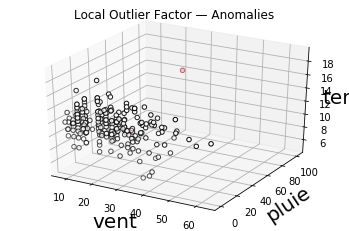

In [10]:
# 3rd algorithm: Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30, contamination=.01)
y_pred = clf.fit_predict(df_curr)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=df_curr[LOF_pred==1]

# 3D Plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c='white',s=20,edgecolor='k')
ax.scatter3D(LOF_anomalies['vent'], LOF_anomalies['pluie'], LOF_anomalies['temp'], c='red')
ax.set_xlabel('vent',fontsize=20)
ax.set_ylabel('pluie',fontsize=20)
ax.set_zlabel('temp',fontsize=20)
plt.title('Local Outlier Factor — Anomalies')

true_predicted = 0
mistakes = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if i in LOF_anomalies.index and i in df_anomaly_reference.index:
        true_predicted += 1
    if i in LOF_anomalies.index and i not in df_anomaly_reference.index:
        mistakes += 1

print("Local Outlier Factor | True Negative = " + str(true_predicted))
print("Local Outlier Factor | False Positive = " + str(mistakes))

### 6.4 Elliptic Envelope
Elliptic Envelope:  The Elliptic Envelope method fits a multivariate gaussian distribution to the dataset. Use the contamination hyperparameter to specify the percentage of observations the algorithm will assign as outliers.

Elliptic Envelope | True Negative = 2
Elliptic Envelope | False Positive = 0


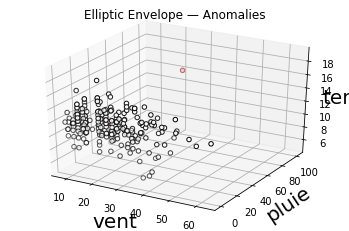

In [11]:
# 4th algorithm: Elliptic Envelope
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=0.005,random_state=0)
clf.fit(df_curr)
ee_scores = pd.Series(clf.decision_function(df_curr)) 
ee_pred = clf.predict(df_curr)
ee_anomalies = df_curr[ee_pred==-1]

# 3D Plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c='white',s=20,edgecolor='k')
ax.scatter3D(ee_anomalies['vent'], ee_anomalies['pluie'], ee_anomalies['temp'], c='red')
ax.set_xlabel('vent',fontsize=20)
ax.set_ylabel('pluie',fontsize=20)
ax.set_zlabel('temp',fontsize=20)
plt.title('Elliptic Envelope — Anomalies')

true_predicted = 0
mistakes = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if i in ee_anomalies.index and i in df_anomaly_reference.index:
        true_predicted += 1
    if i in ee_anomalies.index and i not in df_anomaly_reference.index:
        mistakes += 1

print("Elliptic Envelope | True Negative = " + str(true_predicted))
print("Elliptic Envelope | False Positive = " + str(mistakes))

### 6.5 One-Class SVM
One-class Support Vector Machine: is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

One-Class Support Vector Machines | True Negative = 3
One-Class Support Vector Machines | False Positive = 6


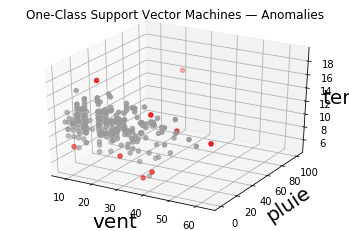

In [12]:
# 5th algorithm: One-Class Support Vector Machines
from sklearn import svm
clf=svm.OneClassSVM(nu=.02,kernel='rbf',gamma=.005)
clf.fit(df_curr)
y_pred=clf.predict(df_curr)

# 3D Plot
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=y_pred, cmap=cmap)
ax.set_xlabel('vent',fontsize=20)
ax.set_ylabel('pluie',fontsize=20)
ax.set_zlabel('temp',fontsize=20)
plt.title('One-Class Support Vector Machines — Anomalies')

true_predicted = 0
mistakes = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if y_pred[i] == -1 and i in df_anomaly_reference.index:
        true_predicted += 1
    if y_pred[i] == -1 and i not in df_anomaly_reference.index:
        mistakes += 1

print("One-Class Support Vector Machines | True Negative = " + str(true_predicted))
print("One-Class Support Vector Machines | False Positive = " + str(mistakes))

## 7. Experimental results
In this section, we will compare the results of each algorithm thanks to the metric that we created.

In fact, our metric consists of defining a data frame called ‘df_anomaly_reference’ from our dataset that contains acquisitions that are outliers.

We will compare the results of each algorithm to the content of this data frame and we will define two values:

-	True Negative (TN): The algorithm has predicted an outlier, as an outlier.
-	False Positive (FP): The algorithm has predicted a non-outlier, as an outlier.

Let’s note that:

- 0 = no outlier = positive
- 1 = outlier = negative
- true = the algorithm predicted correct
- false = the algorithm predicted incorrect

We will work on four months only (January, February, June, July) since it will be the same. We just need to change df_curr to test other months.

The following table presents the experimental results for the month of January.

| Algorithms              | TN | TN/Anomalies(%) | FP |
|-------------------------|----|-----------------|----|
| DBSCAN                  | 1  | 33.33           | 0  |
| IF                      | 1  | 33.33           | 2  |
| LOF                     | 1  | 33.33           | 2  |
| EE (c=0.04)             | 2  | 66.66           | 8  |
| 1CSVM (v=0.02, g=0.005) | 3  | 100             | 6  |

The df_anomaly_reference is created based on normal winter values: ‘pluie’ > 20 or ‘vent’ > 60 or ‘temp’ > 30 or ‘temp’ < 6.

The hyperparameters of EE and 1CSVM were tuned manually and those given in the table had given the best results.

The following table presents the experimental results for the month of June.

| Algorithms              | TN | TN/Anomalies(%) | FP |
|-------------------------|----|-----------------|----|
| DBSCAN                  | 2  | 33.33           | 1  |
| IF                      | 1  | 16.66           | 2  |
| LOF                     | 1  | 16.66           | 2  |
| EE (c=0.03)             | 5  | 83.33           | 3  |
| 1CSVM (v=0.02, g=0.045) | 4  | 66.66           | 1  |

The df_anomaly_reference is created based on normal winter values: ‘pluie’ > 10 or ‘vent’ > 45 or ‘temp’ > 32 or ‘temp’ < 10.

## 8. Conclusion
Let’s note that False Positive will not be a strong criterion in our comparison. In fact, predicting an acquisition as an outlier, when it is not an outlier, is not a big deal.

The results show that One-Class SVM is well accurate in predicting most of the outliers defined by our metric for most of the months.

Its hyperparameters slightly vary from one month to another due to the different atmospheric features.

## 9. References
https://mikulskibartosz.name/outlier-detection-with-scikit-learn-d9246b33d352

https://www.depends-on-the-definition.com/detecting-network-attacks-with-isolation-forests/

http://www.cse.ust.hk/~leichen/courses/comp5331/lectures/LOF_Example.pdf

http://sdsawtelle.github.io/blog/output/week9-anomaly-andrew-ng-machine-learning-with-python.htm

http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/